In [1]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra

import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import random
from imblearn.over_sampling import SMOTE
import sklearn
from sklearn.model_selection import train_test_split,cross_validate,KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score,cross_val_predict

In [3]:
data = pd.read_csv('rotten_tomatoes_movies.csv')
tag = pd.read_csv('tag.csv')

In [4]:
data=data.drop(['directors'],axis=1)

In [5]:
data.isnull().sum()

rotten_tomatoes_link                0
movie_title                         0
movie_info                         24
critics_consensus                8329
poster_image_url                    0
rating                              0
genre                              17
writers                          1349
cast                              284
in_theaters_date                  815
on_streaming_date                   2
runtime_in_minutes                155
studio_name                       416
tomatometer_status                  0
tomatometer_rating                  0
tomatometer_count                   0
audience_status                   252
audience_rating                   252
audience_count                    252
audience_top_critics_count          0
audience_fresh_critics_count        0
audience_rotten_critics_count       0
dtype: int64

In [6]:
data['rating'].value_counts()

R         6136
NR        4862
PG-13     2885
PG        2062
G          652
NC17        37
PG-13)       3
R)           1
Name: rating, dtype: int64

In [7]:

data=data.replace({'rating': {'PG-13)': 'PG-13', 'R)': 'R'}})


In [8]:
data['rating'].value_counts()

R        6137
NR       4862
PG-13    2888
PG       2062
G         652
NC17       37
Name: rating, dtype: int64

In [9]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['tomatometer_status'] = label_encoder.fit_transform(data['tomatometer_status'])

In [10]:
data.head(5)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,poster_image_url,rating,genre,writers,cast,in_theaters_date,...,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count
0,/m/0814255,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,https://resizing.flixster.com/p1veUpQ4ktsSHtRu...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,2,49,144,Spilled,53.0,254287.0,38,71,73
1,/m/0878835,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,https://resizing.flixster.com/0AbudQ4KsB4BeXSB...,R,Comedy,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,0,86,140,Upright,64.0,11567.0,43,121,19
2,/m/10,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,https://resizing.flixster.com/mF0dxH6UTa0FdkMs...,R,"Comedy, Romance",Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,1,68,22,Spilled,53.0,14670.0,2,15,7
3,/m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,https://resizing.flixster.com/u-8xAyGaDVvROLiR...,NR,"Classics, Drama",Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,0,100,51,Upright,97.0,105000.0,6,51,0
4,/m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",https://resizing.flixster.com/FKExgYBHu07XLoil...,G,"Action & Adventure, Drama, Kids & Family",Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,1,89,27,Upright,74.0,68860.0,5,24,3


In [11]:
data.corr()

,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count
runtime_in_minutes,1.000000,-0.105393,0.071270,0.191975,0.168507,0.048799,0.164626,0.190409,0.101849
tomatometer_status,-0.105393,1.000000,-0.806840,-0.275054,-0.582228,-0.042049,-0.262116,-0.534741,0.296627
tomatometer_rating,0.071270,-0.806840,1.000000,0.079565,0.660111,0.014426,0.049651,0.344220,-0.406547
tomatometer_count,0.191975,-0.275054,0.079565,1.000000,0.141012,0.132686,0.928250,0.902671,0.684753
audience_rating,0.168507,-0.582228,0.660111,0.141012,1.000000,0.022812,0.127383,0.312270,-0.217062
audience_count,0.048799,-0.042049,0.014426,0.132686,0.022812,1.000000,0.129592,0.125137,0.081453
audience_top_critics_count,0.164626,-0.262116,0.049651,0.928250,0.127383,0.129592,1.000000,0.805213,0.691071
audience_fresh_critics_count,0.190409,-0.534741,0.344220,0.902671,0.312270,0.125137,0.805213,1.000000,0.304512
audience_rotten_critics_count,0.101849,0.296627,-0.406547,0.684753,-0.217062,0.081453,0.691071,0.304512,1.000000


In [12]:
data['audience_status'].value_counts()

Upright    8953
Spilled    7433
Name: audience_status, dtype: int64

In [13]:
x={'Upright':1,'Spilled':2}
data['audience_status']=data['audience_status'].str.strip().map(x)


In [14]:
data['audience_status'].nunique()

2

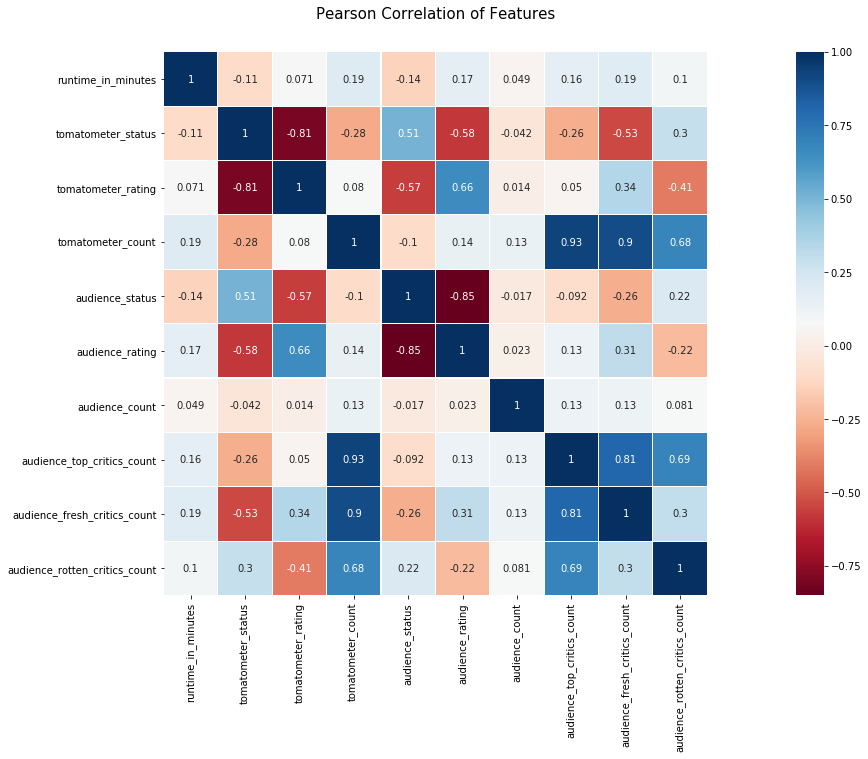

In [15]:
colormap = plt.cm.RdBu
plt.figure(figsize=(32,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns_plot=sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
sns_plot.figure.savefig("output.png")

In [16]:
data= data.drop(['movie_info','critics_consensus','poster_image_url','writers','on_streaming_date','in_theaters_date','studio_name','tomatometer_status','audience_status','audience_top_critics_count','audience_fresh_critics_count','audience_rotten_critics_count'],axis=1)

In [17]:
data.head()

,rotten_tomatoes_link,movie_title,rating,genre,cast,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,/m/0814255,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...","Logan Lerman, Brandon T. Jackson, Alexandra Da...",83.0,49,144,53.0,254287.0
1,/m/0878835,Please Give,R,Comedy,"Catherine Keener, Amanda Peet, Oliver Platt, R...",90.0,86,140,64.0,11567.0
2,/m/10,10,R,"Comedy, Romance","Dudley Moore, Bo Derek, Julie Andrews, Robert ...",118.0,68,22,53.0,14670.0
3,/m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",95.0,100,51,97.0,105000.0
4,/m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family","James Mason, Kirk Douglas, Paul Lukas, Peter L...",127.0,89,27,74.0,68860.0


In [18]:
data['rating'].value_counts()

R        6137
NR       4862
PG-13    2888
PG       2062
G         652
NC17       37
Name: rating, dtype: int64

In [19]:
data = pd.get_dummies(data, prefix_sep= "__", 
                         columns = ['rating'])

In [20]:
data.head(5)

,rotten_tomatoes_link,movie_title,genre,cast,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,rating__G,rating__NC17,rating__NR,rating__PG,rating__PG-13,rating__R
0,/m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...","Logan Lerman, Brandon T. Jackson, Alexandra Da...",83.0,49,144,53.0,254287.0,0,0,0,1,0,0
1,/m/0878835,Please Give,Comedy,"Catherine Keener, Amanda Peet, Oliver Platt, R...",90.0,86,140,64.0,11567.0,0,0,0,0,0,1
2,/m/10,10,"Comedy, Romance","Dudley Moore, Bo Derek, Julie Andrews, Robert ...",118.0,68,22,53.0,14670.0,0,0,0,0,0,1
3,/m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),"Classics, Drama","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",95.0,100,51,97.0,105000.0,0,0,1,0,0,0
4,/m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","Action & Adventure, Drama, Kids & Family","James Mason, Kirk Douglas, Paul Lukas, Peter L...",127.0,89,27,74.0,68860.0,1,0,0,0,0,0


In [21]:
tag.head()

,Unnamed: 0,0
0,/m/0814255,20
1,/m/0878835,122
2,/m/10,18
3,/m/1000013-12_angry_men,47
4,/m/1000079-20000_leagues_under_the_sea,20


In [22]:
data.isnull().sum()

rotten_tomatoes_link      0
movie_title               0
genre                    17
cast                    284
runtime_in_minutes      155
tomatometer_rating        0
tomatometer_count         0
audience_rating         252
audience_count          252
rating__G                 0
rating__NC17              0
rating__NR                0
rating__PG                0
rating__PG-13             0
rating__R                 0
dtype: int64

In [23]:
data = data.dropna(axis=0, subset=['genre'])

In [24]:
from sklearn.preprocessing import MultiLabelBinarizer
import json

## format genre column to be in the form of a list rather than string

genre_new=[] #declare a list
for cell in data['genre']:
    cell=cell.replace(" ","") #remove whitespace
    cell=cell.replace("&", "& ") #add whitespace back in for ampersands
    genre_new.append(cell.split(",")) #for each genre cell, create a list of items from the original string, using a comma as a delimeter
    
#add new genre column to the dataframe
data['genre_new'] = genre_new 

## MultiLabelBinarizer takes an iterable list and turns it into columns with binary values that represent the list.
## For example, [Comedy, Drama] -> Comedy and Drama columns with a value of 1, all other columns with a value of 0

#initialize MultiLabelBinarizer 
mlb = MultiLabelBinarizer() 

#transform the genre_new column to a series of columns with binary values
binary_labels=pd.DataFrame(mlb.fit_transform(data['genre_new']),columns=mlb.classes_) 

#order columns alphabetically
binary_labels=binary_labels.sort_index(axis=1) 

binary_labels.head()

,Action& Adventure,Animation,Anime& Manga,ArtHouse& International,Classics,Comedy,CultMovies,Documentary,Drama,Faith& Spirituality,...,Horror,Kids& Family,Musical& PerformingArts,Mystery& Suspense,Romance,ScienceFiction& Fantasy,SpecialInterest,Sports& Fitness,Television,Western
0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [25]:
data = data.merge(binary_labels, how='inner', left_index=True, right_index=True)
data= data.drop(columns=['genre','genre_new'])
data.head()

,rotten_tomatoes_link,movie_title,cast,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,rating__G,rating__NC17,...,Horror,Kids& Family,Musical& PerformingArts,Mystery& Suspense,Romance,ScienceFiction& Fantasy,SpecialInterest,Sports& Fitness,Television,Western
0,/m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",83.0,49,144,53.0,254287.0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,/m/0878835,Please Give,"Catherine Keener, Amanda Peet, Oliver Platt, R...",90.0,86,140,64.0,11567.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,/m/10,10,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",118.0,68,22,53.0,14670.0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,/m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",95.0,100,51,97.0,105000.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,/m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","James Mason, Kirk Douglas, Paul Lukas, Peter L...",127.0,89,27,74.0,68860.0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [26]:
data['cast'] = data['cast'].apply(lambda x:str(x).split(","))
data['cast'] = data['cast'].apply(lambda x:','.join(x))
# data['directors'] = data['directors'].apply(lambda x:str(x).split(","))
# data['directors'] = data['directors'].apply(lambda x:','.join(x))

In [27]:
data['cast']

0        Logan Lerman, Brandon T. Jackson, Alexandra Da...
1        Catherine Keener, Amanda Peet, Oliver Platt, R...
2        Dudley Moore, Bo Derek, Julie Andrews, Robert ...
3        Martin Balsam, John Fiedler, Lee J. Cobb, E.G....
4        James Mason, Kirk Douglas, Paul Lukas, Peter L...
                               ...                        
16616    Taylor Handley, Alison Folland, Dustin Seavey,...
16617    Steve Guttenberg, Kathleen Quinlan, Arnold Vos...
16618    Fred Astaire, Judy Garland, Gene Kelly, Willia...
16619    David Bowie, Mick Ronson, Trevor Bolder, Mick ...
16620    Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...
Name: cast, Length: 16604, dtype: object

In [28]:
# data1 = pd.read_csv('movie_metadata.csv')
# t = data1[['actor_2_facebook_likes','actor_2_name','actor_1_facebook_likes','actor_1_name','actor_3_facebook_likes','actor_3_name']]


In [29]:

# actor1_data = data1[['actor_1_name','actor_1_facebook_likes']].drop_duplicates(keep= 'first').reset_index(drop=True)
# actor2_data = data1[['actor_2_name','actor_2_facebook_likes']].drop_duplicates(keep= 'first').reset_index(drop=True)
# actor3_data = data1[['actor_3_name','actor_3_facebook_likes']].drop_duplicates(keep= 'first').reset_index(drop=True)
# # director_data = data1[['director_name','director_facebook_likes']].drop_duplicates(keep= 'first').reset_index(drop=True)
# actor1_data.columns,actor2_data.columns,actor3_data.columns = ['actor','likes'],['actor','likes'],['actor','likes']

In [30]:
# f_data = pd.concat([actor2_data,actor2_data,actor3_data]).drop_duplicates(keep= 'first').reset_index(drop=True)

In [31]:
# f_data['actor'] = f_data['actor'].apply(lambda x:str(x).replace(" ", "").lower())

In [32]:
# d = f_data.set_index('actor')['likes'].to_dict()

In [33]:
# li = list()
# i=0
# total = 0
# for x in data['cast']:
#     total=0
#     for y in x:
#         s = str(y).replace(" ", "").lower()
#         if(s in d.keys()):
#             total+=d[s] 
#     li.append(total)
# #     data['cast'][i]=total
#     i=i+1
# data['cast'] = li

In [34]:
# data['directors'] = data['directors'].apply(lambda x:str(x).replace(" ", "").lower())
data['cast'] = data['cast'].apply(lambda x:str(x).replace(" ", "").lower())

In [35]:
# li = ','.join(data['directors']).split(',')
# li=set(li)
# director_dict = {i:0 for i in li}

In [36]:
li = ','.join(data['cast']).split(',')
li=set(li)
cast_dict = {i:0 for i in li}

In [37]:
#  for x in data['directors']:
#     lis=x.split(',')
#     for y in lis:
#         if y in director_dict:
#             val = director_dict.get(y) + 1
#             director_dict[y]=val

            
# dir_li=list()
# i=0
# total = 0
# for x in data['directors']:
#     total=0
#     directs=x.split(',')
#     for y in directs:       
#         if y in director_dict:
#             total+=director_dict[y]*10
#     dir_li.append(total)
# #     data['directors'][i]=total
#     i=i+1
# data['directors'] = dir_li

In [38]:
 for x in data['cast']:
    lis=x.split(',')
    for y in lis:
        if y in cast_dict:
            val = cast_dict.get(y) + 1
            cast_dict[y]=val

            
dir_li=list()
i=0
total = 0
for x in data['cast']:
    total=0
    directs=x.split(',')
    for y in directs:       
        if y in cast_dict:
            total+=cast_dict[y]*10
    dir_li.append(total)
#     data['directors'][i]=total
    i=i+1
data['cast'] = dir_li

In [39]:
len(data[data['cast']==0])

0

In [40]:
data.head()

,rotten_tomatoes_link,movie_title,cast,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,rating__G,rating__NC17,...,Horror,Kids& Family,Musical& PerformingArts,Mystery& Suspense,Romance,ScienceFiction& Fantasy,SpecialInterest,Sports& Fitness,Television,Western
0,/m/0814255,Percy Jackson & the Olympians: The Lightning T...,7150,83.0,49,144,53.0,254287.0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,/m/0878835,Please Give,2600,90.0,86,140,64.0,11567.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,/m/10,10,3180,118.0,68,22,53.0,14670.0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,/m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),2080,95.0,100,51,97.0,105000.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,/m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea",2410,127.0,89,27,74.0,68860.0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [41]:
# data['cast']=pd.to_numeric(data['cast'])
# data['directors']=pd.to_numeric(data['directors'])
data.tail(100)

,rotten_tomatoes_link,movie_title,cast,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,rating__G,rating__NC17,...,Horror,Kids& Family,Musical& PerformingArts,Mystery& Suspense,Romance,ScienceFiction& Fantasy,SpecialInterest,Sports& Fitness,Television,Western
16521,/m/year_one,Year One,6610,97.0,14,173,23.0,336898.0,0,0,...,0,0,0,0,0,0,0,0,0,0
16522,/m/yeh_jawaani_hai_deewani_2013,Yeh Jawaani Hai Deewani,200,125.0,67,6,63.0,2944.0,0,0,...,0,0,0,0,0,0,0,0,0,0
16523,/m/yella,Yella,520,89.0,81,53,53.0,972.0,0,0,...,0,0,0,0,0,0,0,0,0,0
16524,/m/yelling_to_the_sky,Yelling to the Sky,1800,95.0,36,11,46.0,409.0,0,0,...,0,0,0,0,0,0,0,0,0,0
16525,/m/yellowbeard,Yellowbeard,4130,97.0,22,9,64.0,6929.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16616,/m/zerophilia,Zerophilia,500,90.0,25,20,61.0,1628.0,0,0,...,0,0,1,0,0,0,0,0,0,0
16617,/m/zeus_and_roxanne,Zeus and Roxanne,1000,98.0,44,9,42.0,8967.0,0,0,...,0,0,0,0,0,0,0,0,0,0
16618,/m/ziegfeld_follies,Ziegfeld Follies,5000,109.0,67,9,59.0,2874.0,0,0,...,0,0,0,0,0,0,0,0,0,0
16619,/m/ziggy_stardust_and_the_spiders_from_mars_1973,Ziggy Stardust and the Spiders from Mars,290,91.0,73,40,88.0,1906.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
data.iloc[1927]

rotten_tomatoes_link       /m/40_days_and_40_nights
movie_title                   40 Days and 40 Nights
cast                                           3130
runtime_in_minutes                               95
tomatometer_rating                               38
tomatometer_count                               136
audience_rating                                  43
audience_count                               460837
rating__G                                         0
rating__NC17                                      0
rating__NR                                        0
rating__PG                                        0
rating__PG-13                                     0
rating__R                                         1
Action& Adventure                                 0
Animation                                         0
Anime& Manga                                      0
ArtHouse& International                           0
Classics                                          0
Comedy      

In [43]:
data.isnull().sum()

rotten_tomatoes_link         0
movie_title                  0
cast                         0
runtime_in_minutes         155
tomatometer_rating           0
tomatometer_count            0
audience_rating            252
audience_count             252
rating__G                    0
rating__NC17                 0
rating__NR                   0
rating__PG                   0
rating__PG-13                0
rating__R                    0
Action& Adventure            0
Animation                    0
Anime& Manga                 0
ArtHouse& International      0
Classics                     0
Comedy                       0
CultMovies                   0
Documentary                  0
Drama                        0
Faith& Spirituality          0
Gay& Lesbian                 0
Horror                       0
Kids& Family                 0
Musical& PerformingArts      0
Mystery& Suspense            0
Romance                      0
ScienceFiction& Fantasy      0
SpecialInterest              0
Sports& 

In [44]:
data.corr()

,cast,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,rating__G,rating__NC17,rating__NR,rating__PG,...,Horror,Kids& Family,Musical& PerformingArts,Mystery& Suspense,Romance,ScienceFiction& Fantasy,SpecialInterest,Sports& Fitness,Television,Western
cast,1.000000,0.222311,-0.142755,0.365830,-0.020722,0.113293,-0.009031,-0.018603,-0.376424,0.087945,...,-0.012587,0.001319,-0.005686,0.009117,0.008146,0.002703,-0.022347,-0.002811,-0.002778,0.001683
runtime_in_minutes,0.222311,1.000000,0.071590,0.191851,0.168294,0.048793,-0.027534,0.008576,-0.105755,0.010266,...,-0.022121,-0.016287,0.003260,-0.000981,0.020085,-0.004394,-0.014611,0.007098,-0.002788,0.002732
tomatometer_rating,-0.142755,0.071590,1.000000,0.079822,0.660195,0.014433,0.065044,0.013278,0.275470,-0.015538,...,-0.013772,0.001111,0.017904,-0.023261,0.008291,-0.007649,0.006536,0.012777,0.011899,-0.000504
tomatometer_count,0.365830,0.191851,0.079822,1.000000,0.141117,0.132706,-0.059459,-0.003597,-0.327942,-0.009986,...,0.005195,-0.002659,0.014204,-0.017647,-0.002128,0.007568,0.000786,0.001582,-0.007099,0.005731
audience_rating,-0.020722,0.168294,0.660195,0.141117,1.000000,0.022769,0.076804,0.017086,0.106833,0.041987,...,-0.032171,0.000550,0.029420,-0.034964,0.010349,-0.017422,0.010169,0.015626,0.014421,-0.005005
audience_count,0.113293,0.048793,0.014433,0.132706,0.022769,1.000000,-0.002816,-0.003628,-0.051745,0.011418,...,0.007028,-0.003294,0.005368,-0.012077,0.009365,-0.002145,-0.002928,0.027946,-0.007314,0.001008
rating__G,-0.009031,-0.027534,0.065044,-0.059459,0.076804,-0.002816,1.000000,-0.009554,-0.129922,-0.075960,...,-0.016316,0.063430,0.024682,-0.021498,0.009046,0.023967,-0.000938,-0.002647,0.009700,-0.012248
rating__NC17,-0.018603,0.008576,0.013278,-0.003597,0.017086,-0.003628,-0.009554,1.000000,-0.030370,-0.017756,...,0.007044,-0.001956,-0.000938,-0.010911,0.004002,0.004681,0.006313,-0.004877,-0.005937,-0.006223
rating__NR,-0.376424,-0.105755,0.275470,-0.327942,0.106833,-0.051745,-0.129922,-0.030370,1.000000,-0.241455,...,-0.016832,-0.018136,0.001142,-0.017954,0.006016,-0.010188,0.025047,0.004994,-0.001507,-0.003801
rating__PG,0.087945,0.010266,-0.015538,-0.009986,0.041987,0.011418,-0.075960,-0.017756,-0.241455,1.000000,...,-0.023845,0.050845,-0.007479,-0.015504,0.006221,0.028519,-0.002491,0.016751,0.014914,0.008467


In [45]:
data['label']=tag['0']

In [46]:
data.head()

,rotten_tomatoes_link,movie_title,cast,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,rating__G,rating__NC17,...,Kids& Family,Musical& PerformingArts,Mystery& Suspense,Romance,ScienceFiction& Fantasy,SpecialInterest,Sports& Fitness,Television,Western,label
0,/m/0814255,Percy Jackson & the Olympians: The Lightning T...,7150,83.0,49,144,53.0,254287.0,0,0,...,0,0,0,0,1,0,0,0,0,20.0
1,/m/0878835,Please Give,2600,90.0,86,140,64.0,11567.0,0,0,...,0,0,0,0,0,0,0,0,0,122.0
2,/m/10,10,3180,118.0,68,22,53.0,14670.0,0,0,...,0,0,0,1,0,0,0,0,0,18.0
3,/m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),2080,95.0,100,51,97.0,105000.0,0,0,...,0,0,0,0,0,0,0,0,0,47.0
4,/m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea",2410,127.0,89,27,74.0,68860.0,1,0,...,1,0,0,0,0,0,0,0,0,20.0


In [47]:
data=data.drop(columns=['rotten_tomatoes_link','movie_title'])

In [48]:
data.fillna(data.mean(),inplace = True)

In [49]:
data.isnull().sum()

cast                       0
runtime_in_minutes         0
tomatometer_rating         0
tomatometer_count          0
audience_rating            0
audience_count             0
rating__G                  0
rating__NC17               0
rating__NR                 0
rating__PG                 0
rating__PG-13              0
rating__R                  0
Action& Adventure          0
Animation                  0
Anime& Manga               0
ArtHouse& International    0
Classics                   0
Comedy                     0
CultMovies                 0
Documentary                0
Drama                      0
Faith& Spirituality        0
Gay& Lesbian               0
Horror                     0
Kids& Family               0
Musical& PerformingArts    0
Mystery& Suspense          0
Romance                    0
ScienceFiction& Fantasy    0
SpecialInterest            0
Sports& Fitness            0
Television                 0
Western                    0
label                      0
dtype: int64

# Skewness

<Figure size 1440x1440 with 0 Axes>

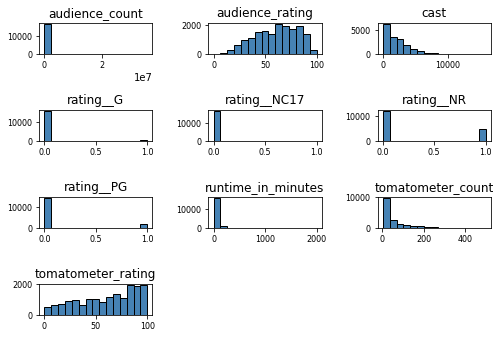

In [50]:
plt.figure(figsize=(20,20))
data.iloc[:,:10].hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

runtime_in_minutes    27.756649
rating__NC17          21.114913
audience_count        17.973384
rating__G              4.744597
rating__PG             2.286012
tomatometer_count      2.010689
cast                   1.334875
rating__NR             0.913524
tomatometer_rating     0.419065
audience_rating        0.309191
dtype: float64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

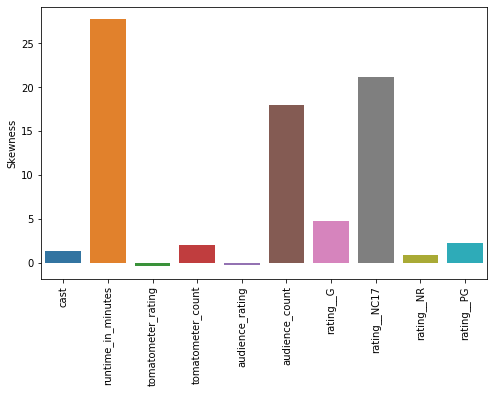

In [51]:
skew=data.iloc[:,:10].skew()
print(skew.abs().sort_values(ascending=False))
skew_df=pd.DataFrame(skew,index=None,columns=['Skewness'])
plt.figure(figsize=(8,5))
sns.barplot(x=skew_df.index,y='Skewness',data=skew_df)
plt.xticks(rotation=90)

In [52]:
data_copy=data.copy()

In [53]:
def remove_skew_n_power(col):
  print("Removing Skew by applying power of N :")
  power = 0
  min_skew = 99999
  for i in range(1,11):
    skew = abs((col**i).skew())
    print(i,skew)
    if(skew < min_skew) :
      min_skew = skew
      power = i
  return power, min_skew

In [54]:
def remove_skew_n_root(col):
  print("Removing Skew by applying root of N :")
  power = 0
  min_skew = 99999
  for i in range(1,11):
    skew = abs((col**(1/i)).skew())
    print(i,skew)
    if(skew < min_skew) :
      min_skew = skew
      power = 1/i
  return power, min_skew

Directors

In [55]:
# data["directors"].skew()

In [56]:
# print('Minimum Skewness (N, Skewness) :', remove_skew_n_power(data["directors"]))
# print('\n\n')
# print('Minimum Skewness (N, Skewness) :', remove_skew_n_root(data["directors"]))

In [57]:
# from scipy import stats
# plt.figure(figsize=(8,6))
# sns.distplot(data["directors"]**9)

In [58]:
# data["directors"]=data["directors"]**9

Cast

In [59]:
data["cast"].skew()

1.3348753694915416

In [60]:
print('Minimum Skewness (N, Skewness) :', remove_skew_n_power(data["cast"]))
print('\n\n')
print('Minimum Skewness (N, Skewness) :', remove_skew_n_root(data["cast"]))

Removing Skew by applying power of N :
1 1.3348753694915416
2 4.656917367838057
3 11.173853185562198
4 20.56244014901088
5 0.514842838648432
6 0.18494244576239627
7 0.03715251614592233
8 0.10202182055209488
9 0.00012776602130596342
10 0.0293323869143319
Minimum Skewness (N, Skewness) : (9, 0.00012776602130596342)



Removing Skew by applying root of N :
1 1.3348753694915416
2 0.24334411888606086
3 0.12845981298714887
4 0.3293505865002838
5 0.4575234118666766
6 0.5470034285283267
7 0.6132024946140723
8 0.6642320043108074
9 0.7048008682756572
10 0.7378411856190111
Minimum Skewness (N, Skewness) : (0.3333333333333333, 0.12845981298714887)


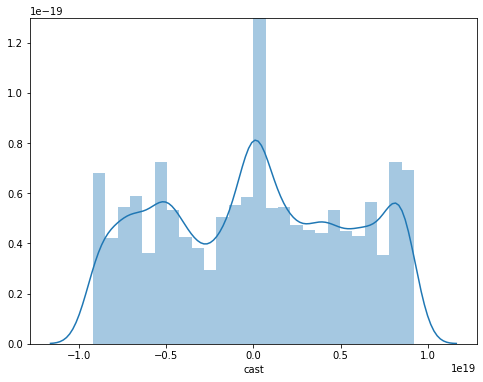

In [61]:
from scipy import stats
plt.figure(figsize=(8,6))
sns.distplot(data["cast"]**9)

In [62]:
data["cast"]=data["cast"]**9

runtime_in_minutes

In [63]:
data["runtime_in_minutes"].skew()

27.75664935979491

In [64]:
print('Minimum Skewness (N, Skewness) :', remove_skew_n_power(data["runtime_in_minutes"]))
print('\n\n')
print('Minimum Skewness (N, Skewness) :', remove_skew_n_root(data["runtime_in_minutes"]))

Removing Skew by applying power of N :
1 27.75664935979491
2 123.40277640145297
3 128.72824532927723
4 128.85103089721378
5 128.8562070895488
6 128.856491626474
7 128.85650828818203
8 128.85650927964866
9 128.85650933897085
10 128.85650934252945
Minimum Skewness (N, Skewness) : (1, 27.75664935979491)



Removing Skew by applying root of N :
1 27.75664935979491
2 2.684163318954417
3 0.33326843844970155
4 0.7364514366829015
5 1.4366073408081355
6 1.9498066586237994
7 2.346552646003817
8 2.663596911727888
9 2.923083394057524
10 3.1394662687378507
Minimum Skewness (N, Skewness) : (0.3333333333333333, 0.33326843844970155)


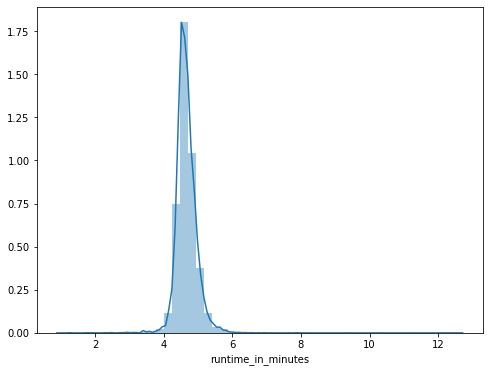

In [65]:
from scipy import stats
plt.figure(figsize=(8,6))
sns.distplot(data["runtime_in_minutes"]**(1/3))

In [66]:
data["runtime_in_minutes"]=data["runtime_in_minutes"]**(1/3)

audience_count

In [67]:
data["audience_count"].skew()

17.973383530483346

In [68]:
print('Minimum Skewness (N, Skewness) :', remove_skew_n_power(data["audience_count"]))
print('\n\n')
print('Minimum Skewness (N, Skewness) :', remove_skew_n_root(data["audience_count"]))

Removing Skew by applying power of N :
1 17.973383530483346
2 18.22962793925369
3 18.344917989299923
4 18.51305921071749
5 18.739971920213115
6 19.032220744022386
7 19.397405249196343
8 19.844159043422685
9 20.38210132596836
10 21.02173172102365
Minimum Skewness (N, Skewness) : (1, 17.973383530483346)



Removing Skew by applying root of N :
1 17.973383530483346
2 11.774875646655012
3 5.358530742938584
4 3.0000598297488663
5 2.0487888057679036
6 1.569427917394569
7 1.2854472486192707
8 1.0980106398071265
9 0.9648224870349464
10 0.8650896398955965
Minimum Skewness (N, Skewness) : (0.1, 0.8650896398955965)


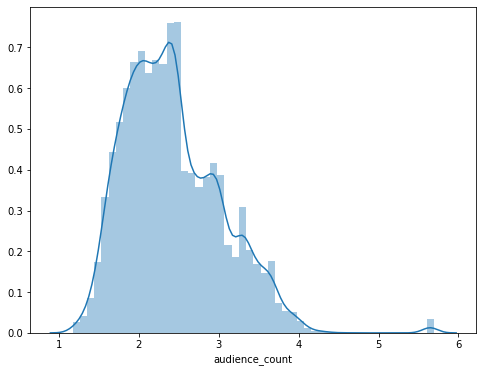

In [69]:
from scipy import stats
plt.figure(figsize=(8,6))
sns.distplot(data["audience_count"]**(1/10))

In [70]:
data["audience_count"]=data["audience_count"]**(1/10)

tomatometer_count 

In [71]:
data["tomatometer_count"].skew()

2.010688866976988

In [72]:
print('Minimum Skewness (N, Skewness) :', remove_skew_n_power(data["tomatometer_count"]))
print('\n\n')
print('Minimum Skewness (N, Skewness) :', remove_skew_n_root(data["tomatometer_count"]))

Removing Skew by applying power of N :
1 2.010688866976988
2 4.8432358803047775
3 9.008827355799514
4 13.914241765707272
5 19.0827211296708
6 24.249469758055053
7 29.202481848215808
8 0.8531969390813795
9 0.1751343113053768
10 0.023309991398489455
Minimum Skewness (N, Skewness) : (10, 0.023309991398489455)



Removing Skew by applying root of N :
1 2.010688866976988
2 1.0395093263151742
3 0.7486487323933328
4 0.6068846879312034
5 0.5228364433131846
6 0.4672061779584223
7 0.42766445653713997
8 0.3981141402295386
9 0.3751935050923076
10 0.3568968065098624
Minimum Skewness (N, Skewness) : (0.1, 0.3568968065098624)


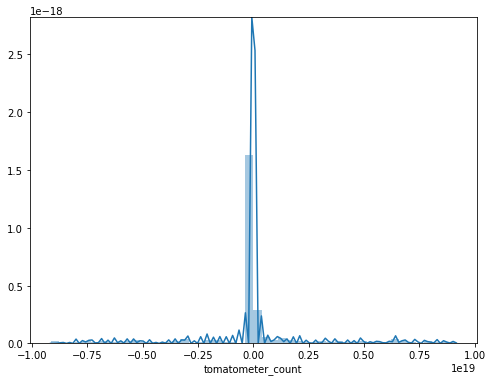

In [73]:
from scipy import stats
plt.figure(figsize=(8,6))
sns.distplot(data["tomatometer_count"]**(10))

In [74]:
data["tomatometer_count"]=data["tomatometer_count"]**(10)

# Outlier Removal

In [75]:
# q1, q2, q3 = data['directors'].quantile([.25,.50,.75])
# IQR = q3-q1
# Min = q1 - IQR*1.5
# Max = q3 + IQR*1.5
# data_outliers = data[data['directors']<Min]
# data_outliers = pd.concat([data_outliers, data[data['directors']>Max]])
# no_outlier_data = data[data['directors']>Min]
# no_outlier_data = no_outlier_data[no_outlier_data['directors']<Max]
# print("-> Percentage of data loss= ", len(data_outliers['directors'])*100/len(data['directors']))
# sns.distplot(no_outlier_data['directors'])

In [76]:
# data = no_outlier_data.copy()

-> Percentage of data loss=  0.0


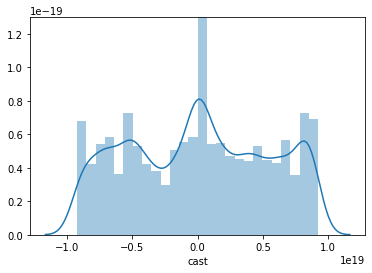

In [77]:
q1, q2, q3 = data['cast'].quantile([.25,.50,.75])
IQR = q3-q1
Min = q1 - IQR*1.5
Max = q3 + IQR*1.5
data_outliers = data[data['cast']<Min]
data_outliers = pd.concat([data_outliers, data[data['cast']>Max]])
no_outlier_data = data[data['cast']>Min]
no_outlier_data = no_outlier_data[no_outlier_data['cast']<Max]
print("-> Percentage of data loss= ", len(data_outliers['cast'])*100/len(data['cast']))
sns.distplot(no_outlier_data['cast'])

In [79]:
data = no_outlier_data.copy()

-> Percentage of data loss=  3.463020958805107


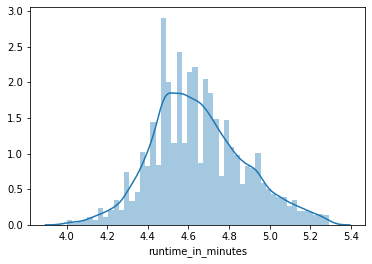

In [80]:
q1, q2, q3 = data['runtime_in_minutes'].quantile([.25,.50,.75])
IQR = q3-q1
Min = q1 - IQR*1.5
Max = q3 + IQR*1.5
data_outliers = data[data['runtime_in_minutes']<Min]
data_outliers = pd.concat([data_outliers, data[data['runtime_in_minutes']>Max]])
no_outlier_data = data[data['runtime_in_minutes']>Min]
no_outlier_data = no_outlier_data[no_outlier_data['runtime_in_minutes']<Max]
print("-> Percentage of data loss= ", len(data_outliers['runtime_in_minutes'])*100/len(data['runtime_in_minutes']))
sns.distplot(no_outlier_data['runtime_in_minutes'])

In [81]:
data = no_outlier_data.copy()

-> Percentage of data loss=  0.4179923887953085


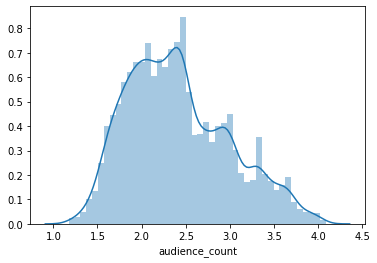

In [82]:
q1, q2, q3 = data['audience_count'].quantile([.25,.50,.75])
IQR = q3-q1
Min = q1 - IQR*1.5
Max = q3 + IQR*1.5
data_outliers = data[data['audience_count']<Min]
data_outliers = pd.concat([data_outliers, data[data['audience_count']>Max]])
no_outlier_data = data[data['audience_count']>Min]
no_outlier_data = no_outlier_data[no_outlier_data['audience_count']<Max]
print("-> Percentage of data loss= ", len(data_outliers['audience_count'])*100/len(data['audience_count']))
sns.distplot(no_outlier_data['audience_count'])

In [83]:
data = no_outlier_data.copy()

-> Percentage of data loss=  0.0


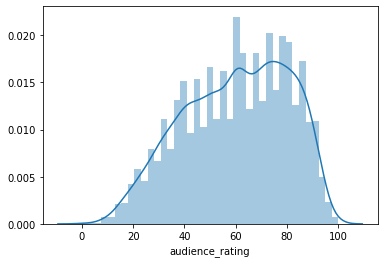

In [86]:
q1, q2, q3 = data['audience_rating'].quantile([.25,.50,.75])
IQR = q3-q1
Min = q1 - IQR*1.5
Max = q3 + IQR*1.5
data_outliers = data[data['audience_rating']<Min]
data_outliers = pd.concat([data_outliers, data[data['audience_rating']>Max]])
no_outlier_data = data[data['audience_rating']>Min]
no_outlier_data = no_outlier_data[no_outlier_data['audience_rating']<Max]
print("-> Percentage of data loss= ", len(data_outliers['audience_rating'])*100/len(data['audience_rating']))
sns.distplot(no_outlier_data['audience_rating'])

In [87]:
data = no_outlier_data.copy()

-> Percentage of data loss=  0.0


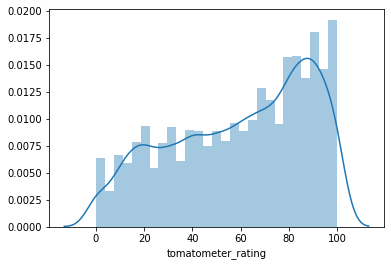

In [88]:
q1, q2, q3 = data['tomatometer_rating'].quantile([.25,.50,.75])
IQR = q3-q1
Min = q1 - IQR*1.5
Max = q3 + IQR*1.5
data_outliers = data[data['tomatometer_rating']<Min]
data_outliers = pd.concat([data_outliers, data[data['tomatometer_rating']>Max]])
no_outlier_data = data[data['tomatometer_rating']>Min]
no_outlier_data = no_outlier_data[no_outlier_data['tomatometer_rating']<Max]
print("-> Percentage of data loss= ", len(data_outliers['tomatometer_rating'])*100/len(data['tomatometer_rating']))
sns.distplot(no_outlier_data['tomatometer_rating'])

In [89]:
data = no_outlier_data.copy()

In [90]:
data.isnull().sum()

cast                       0
runtime_in_minutes         0
tomatometer_rating         0
tomatometer_count          0
audience_rating            0
audience_count             0
rating__G                  0
rating__NC17               0
rating__NR                 0
rating__PG                 0
rating__PG-13              0
rating__R                  0
Action& Adventure          0
Animation                  0
Anime& Manga               0
ArtHouse& International    0
Classics                   0
Comedy                     0
CultMovies                 0
Documentary                0
Drama                      0
Faith& Spirituality        0
Gay& Lesbian               0
Horror                     0
Kids& Family               0
Musical& PerformingArts    0
Mystery& Suspense          0
Romance                    0
ScienceFiction& Fantasy    0
SpecialInterest            0
Sports& Fitness            0
Television                 0
Western                    0
label                      0
dtype: int64

In [91]:
from sklearn.preprocessing import MinMaxScaler

In [92]:
mms = MinMaxScaler()

In [93]:
data[["runtime_in_minutes","tomatometer_rating","tomatometer_count","audience_rating","audience_count"]]=mms.fit_transform(data[["runtime_in_minutes","tomatometer_rating","tomatometer_count","audience_rating","audience_count"]])

In [94]:
data

,cast,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,rating__G,rating__NC17,rating__NR,rating__PG,...,Kids& Family,Musical& PerformingArts,Mystery& Suspense,Romance,ScienceFiction& Fantasy,SpecialInterest,Sports& Fitness,Television,Western,label
0,-4861322747967869440,0.280768,0.49,0.327139,0.53,0.788088,0,0,0,1,...,0,0,0,0,1,0,0,0,0,20.000000
1,3521526308947361792,0.373306,0.86,0.303710,0.64,0.471446,0,0,0,0,...,0,0,0,0,0,0,0,0,0,122.000000
2,7689786742931193856,0.701681,0.68,0.499671,0.53,0.492476,0,0,0,0,...,0,0,0,1,0,0,0,0,0,18.000000
3,5208448153426067456,0.436503,1.00,0.506164,0.97,0.687260,0,0,1,0,...,0,0,0,0,0,0,0,0,0,47.000000
4,368275901303695872,0.796020,0.89,0.499681,0.74,0.642220,1,0,0,0,...,1,0,0,0,0,0,0,0,0,20.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16616,2184219706384449536,0.373306,0.25,0.499671,0.61,0.315746,0,0,1,0,...,0,1,0,0,0,0,0,0,0,26.260602
16617,-6930898827444486144,0.473363,0.44,0.499670,0.42,0.449463,0,0,0,1,...,0,0,0,0,0,0,0,0,0,26.260602
16618,-8441533715770769408,0.602414,0.67,0.499670,0.59,0.357780,0,0,1,0,...,0,0,0,0,0,0,0,0,0,26.260602
16619,8005133933292429824,0.386129,0.73,0.500242,0.88,0.327168,0,0,0,1,...,0,0,0,0,0,0,0,0,0,26.260602


In [95]:
data['label'].describe()

count    15962.000000
mean        26.046095
std         48.291610
min       -173.000000
25%          3.000000
50%         13.000000
75%         35.000000
max        461.000000
Name: label, dtype: float64

In [96]:
temp=data['label'].mean()
temp

26.046095455019035

In [97]:
data['label']=data['label'].apply(lambda x: 1 if x>temp else 0)

In [98]:
data[data['label']==1].count()

cast                       5159
runtime_in_minutes         5159
tomatometer_rating         5159
tomatometer_count          5159
audience_rating            5159
audience_count             5159
rating__G                  5159
rating__NC17               5159
rating__NR                 5159
rating__PG                 5159
rating__PG-13              5159
rating__R                  5159
Action& Adventure          5159
Animation                  5159
Anime& Manga               5159
ArtHouse& International    5159
Classics                   5159
Comedy                     5159
CultMovies                 5159
Documentary                5159
Drama                      5159
Faith& Spirituality        5159
Gay& Lesbian               5159
Horror                     5159
Kids& Family               5159
Musical& PerformingArts    5159
Mystery& Suspense          5159
Romance                    5159
ScienceFiction& Fantasy    5159
SpecialInterest            5159
Sports& Fitness            5159
Televisi

In [99]:
X = data.drop('label', axis = 1).values
y = data['label'].values.reshape(-1,1)

In [100]:
data.shape

(15962, 34)

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)
sm = SMOTE(random_state=12)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [102]:
X_train.shape

(16158, 33)

# KNN

In [103]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier()
classifier_knn = classifier_knn.fit(X_train, y_train.ravel())
y_pred_knn_train = classifier_knn.predict(X_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training set: ", accuracy_knn_train)

y_pred_knn_test = classifier_knn.predict(X_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Test set: ", accuracy_knn_test)

Training set:  0.7616660477781904
Test set:  0.5086444500125282


In [104]:
from sklearn.metrics import f1_score
fscore_knn_test =f1_score(y_test, y_pred_knn_test, average='macro')
print("F score: ", fscore_knn_test)

F score:  0.49295688052763803


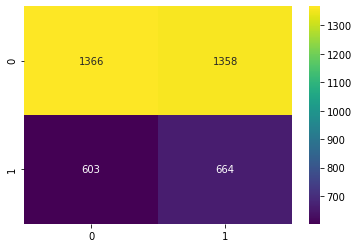

In [105]:

from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

# Naive Bayes

In [106]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [107]:
y_pred_nb_train = classifier_nb.predict(X_train)
accuracy_nb_train = accuracy_score(y_train, y_pred_nb_train)
print("Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(X_test)
accuracy_nb_test = accuracy_score(y_test, y_pred_nb_test)
print("Test set: ", accuracy_nb_test)

Training set:  0.5103354375541528
Test set:  0.44450012528188426


In [108]:
from sklearn.metrics import f1_score
fscore_knn_test =f1_score(y_test, y_pred_nb_test, average='macro')
print("F score: ", fscore_knn_test)

F score:  0.44399746356609765


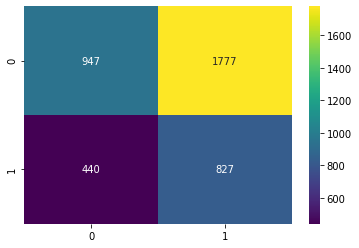

In [109]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

# Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier()

In [111]:
clf.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [112]:
y_pred_rf_train = clf.predict(X_train)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print("Training set: ", accuracy_rf_train)

y_pred_rf_test = clf.predict(X_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print("Test set: ", accuracy_rf_test)

Training set:  1.0
Test set:  0.6682535705337008


In [113]:
from sklearn.metrics import f1_score
fscore_knn_test =f1_score(y_test, y_pred_rf_test, average='macro')
print("F score: ", fscore_knn_test)

F score:  0.5142890864220772


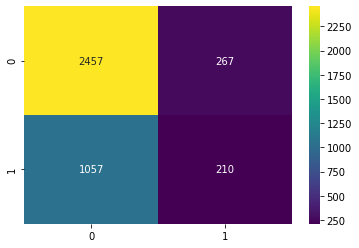

In [114]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()


# Logistic Regression

In [115]:
# Fitting Logistic Regression to the Training set
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [116]:
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train, y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
y_pred_lr_train = classifier_lr.predict(X_train)
accuracy_lr_train = accuracy_score(y_train, y_pred_lr_train)
print("Training set: ", accuracy_lr_train)

y_pred_lr_test = classifier_lr.predict(X_test)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
print("Test set: ", accuracy_lr_test)

Training set:  0.5035895531625201
Test set:  0.5108995239288399


In [118]:
from sklearn.metrics import f1_score
fscore_knn_test =f1_score(y_test, y_pred_lr_test, average='macro')
print("F score: ", fscore_knn_test)

F score:  0.4889560272030875


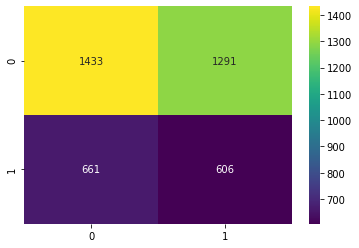

In [119]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

# SVM

In [120]:
from sklearn.svm import SVC
classifier_svm = SVC()

In [121]:
classifier_svm.fit(X_train, y_train.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [122]:
y_pred_svm_train = classifier_svm.predict(X_train)
accuracy_svm_train = accuracy_score(y_train, y_pred_svm_train)
print("Training set: ", accuracy_svm_train)

y_pred_svm_test = classifier_svm.predict(X_test)
accuracy_svm_test = accuracy_score(y_test, y_pred_svm_test)
print("Test set: ", accuracy_svm_test)

Training set:  0.5119445475925238
Test set:  0.45001252818842397


In [123]:
from sklearn.metrics import f1_score
fscore_knn_test =f1_score(y_test, y_pred_svm_test, average='macro')
print("F score: ", fscore_knn_test)

F score:  0.4479490715752452


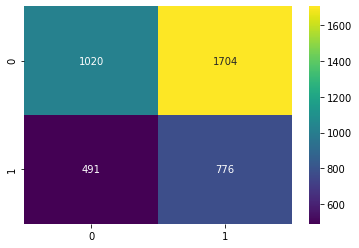

In [124]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

# ANN

In [125]:
# import keras
# from keras.models import Sequential
# from keras.layers import Dense

In [126]:
# sc_X = StandardScaler()
# X_train_scaled = sc_X.fit_transform(X_train)
# X_test_scaled = sc_X.fit_transform(X_test)
# print(X_train_scaled.shape)
# print(X_test_scaled.shape)

In [127]:
# from keras.utils import to_categorical
# def encode(data):
#     print('Shape of data (BEFORE encode): %s' % str(data.shape))
#     encoded = to_categorical(data)
#     print('Shape of data (AFTER  encode): %s\n' % str(encoded.shape))
#     return encoded

In [128]:
# y_train_encoded = encode(y_train)

In [129]:
# y_test_encoded = encode(y_test)

In [130]:
# y_train_encoded = np.delete(y_train_encoded, [0,4], axis = 1)
# y_test_encoded = np.delete(y_test_encoded, [0,4], axis = 1)
# print(y_train_encoded[2])
# print(y_test_encoded[2])

In [131]:
# # Initialising the ANN
# classifier = Sequential()

# # Adding the input layer and the first hidden layer
# classifier.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))

# # Adding the second hidden layer
# classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))

# # Adding the output layer
# classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'softmax'))

# # Compiling the ANN
# classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# # Fitting the ANN to the Training set
# history = classifier.fit(X_train_scaled, y_train_encoded, validation_data=(X_test_scaled, y_test_encoded), batch_size = 100, epochs = 1150)

In [132]:
# f, axes = plt.subplots(1,2,figsize=(14,4))

# axes[0].plot(history.history['loss'])
# axes[0].plot(history.history['val_loss'])
# axes[0].set_xlabel('Loss', fontsize=14)
# axes[0].set_ylabel('Epuch', fontsize=14)
# axes[0].yaxis.tick_left()
# axes[0].legend(['Train', 'Test'], loc='upper left')

# axes[1].plot(history.history.get('acc')[-1]
# axes[1].plot(history.history.get('val_acc')[-1]
# axes[1].set_xlabel('Accuracy', fontsize=14)
# axes[1].set_ylabel('Epoch', fontsize=14)
# axes[1].yaxis.set_label_position("right")
# axes[1].yaxis.tick_right()
# axes[1].legend(['Train', 'Test'], loc='upper left')

# plt.show()

In [133]:
# print("Training set: ", history.history.get('acc')[-1])
# print("Test set: ", history.history.get('val_acc')[-1])

# Cross Validation

In [134]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
np.mean(cross_val_score(classifier_nb, X_train, y_train.ravel(), cv=cv))

0.5094884488448845

In [135]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
np.mean(cross_val_score(classifier_knn, X_train, y_train.ravel(), cv=cv))


0.6058580858085808

In [136]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
np.mean(cross_val_score(clf, X_train, y_train.ravel(), cv=cv))

0.7424092409240923

In [137]:

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
np.mean(cross_val_score(classifier_lr, X_train, y_train.ravel(), cv=cv))

0.5051155115511551

In [138]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
np.mean(cross_val_score(classifier_lr, X_train, y_train.ravel(), cv=cv))

0.5051155115511551

In [139]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
np.mean(cross_val_score(classifier_svm, X_train, y_train.ravel(), cv=cv))

0.5051980198019803